In [1]:
import pandas as pd
from aeon.visualisation import plot_critical_difference

In [2]:
results_Tan2020 = pd.read_csv('./results_Tan2020.csv').set_index('Dataset')
results_GuijoRubio2023 = pd.read_csv('./results_Guijo-Rubio2023.csv').set_index('Dataset')
results_this = pd.read_csv('./results_tsmix+gmlp.csv').set_index('Dataset')

In [3]:
df_cd_mlps = results_this
df_cd_vs_tan2020 = results_Tan2020.join(results_this['tsmix+gmlp'])
df_cd_vs_gr2023 = results_GuijoRubio2023.join(results_this['tsmix+gmlp'])

/Users/terence/miniforge3/envs/tsermlp/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:600: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))


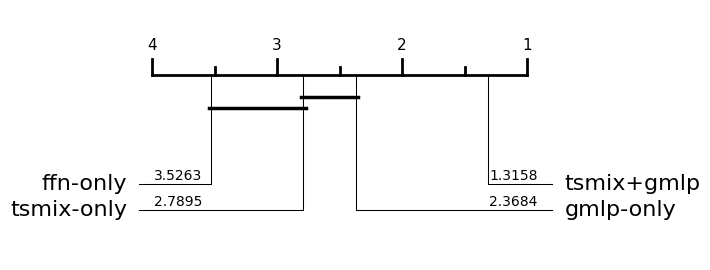

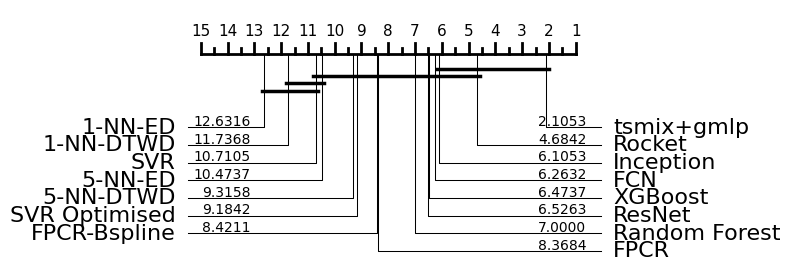

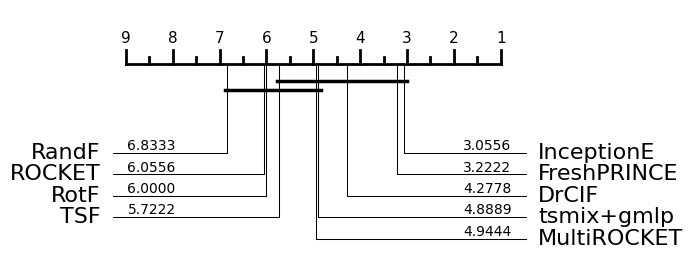

In [4]:
figs = {
    'fig_cd_mlps.pdf': df_cd_mlps,
    'fig_cd_vs_tan2020.pdf': df_cd_vs_tan2020,
    'fig_cd_vs_GR_best.pdf': df_cd_vs_gr2023,
}

for path, df in figs.items():
    fig, ax = plot_critical_difference(scores=df.values, labels=df.columns, lower_better=True, test="wilcoxon",
                                       alpha=0.05, width=6)

    fig.set_size_inches(6, 2.5)
    fig.set_dpi(100)

    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    bbox.x0 -= 0.75
    bbox.x1 += 1.65
    bbox.y1 += 0.35

    fig.savefig(path, bbox_inches=bbox)
    

In [5]:
df_cd_mlps.rank(axis=1).astype(int)

,ffn-only,gmlp-only,tsmix+gmlp,tsmix-only
Dataset,,,,
AppliancesEnergy,4,3,1,2
AustraliaRainfall,4,1,2,3
BeijingPM10Quality,4,2,1,3
BeijingPM25Quality,4,2,1,3
BenzeneConcentration,4,2,1,3
BIDMC32HR,3,4,1,2
BIDMC32RR,1,3,2,4
BIDMC32SpO2,3,1,2,4
Covid3Month,3,2,1,4


In [6]:
df_cd_vs_tan2020.rank(axis=1).astype(int)

,FPCR,FPCR-Bspline,SVR,SVR Optimised,Random Forest,XGBoost,1-NN-ED,5-NN-ED,1-NN-DTWD,5-NN-DTWD,Rocket,FCN,ResNet,Inception,tsmix+gmlp
Dataset,,,,,,,,,,,,,,,
AppliancesEnergy,13,13,7,5,6,8,12,10,15,9,2,3,4,11,1
AustraliaRainfall,6,7,9,9,4,8,15,12,14,13,2,5,3,11,1
BeijingPM10Quality,7,8,9,9,3,2,15,12,14,11,13,4,5,6,1
BeijingPM25Quality,9,8,13,10,6,2,14,12,15,11,5,3,7,4,1
BenzeneConcentration,14,15,7,7,3,2,13,12,10,9,5,11,6,4,1
BIDMC32HR,9,10,6,5,13,8,12,11,15,14,7,4,3,2,1
BIDMC32RR,5,4,12,2,13,14,15,11,7,6,10,8,9,1,3
BIDMC32SpO2,7,6,5,4,3,2,12,11,9,8,10,14,15,13,1
Covid3Month,7,7,12,12,3,6,10,2,9,4,5,14,15,11,1


In [7]:
df_cd_vs_gr2023.rank(axis=1).astype(int)

,ROCKET,DrCIF,TSF,InceptionE,RotF,FreshPRINCE,MultiROCKET,RandF,tsmix+gmlp
Dataset,,,,,,,,,
AppliancesEnergy,5,3,7,9,4,1,6,8,2
BeijingPM10Quality,9,4,6,1,2,3,8,5,7
BeijingPM25Quality,9,5,8,1,2,3,7,4,6
BenzeneConcentration,7,8,9,1,4,6,5,3,2
BIDMC32HR,2,5,6,1,7,4,3,8,9
BIDMC32RR,3,5,6,2,7,4,1,8,9
BIDMC32SpO2,2,5,6,1,7,4,3,8,9
Covid3Month,7,3,2,8,5,1,9,4,6
FloodModeling1,7,4,5,1,8,3,6,9,2
